# **Práctica 3: Clasificación Jerárquica**
* **Master:** Inteligencia Computacional y Internet de las Cosas
* **Asignatura:** Clasificación Non-Convencional
* **Estudiante:** Mabrouka Salmi
* **Fecha:** 14-03-2023
* **El Cuaderno Colab de la [Práctica](https://colab.research.google.com/drive/11QDeU_IpPXPTBPpoXXK2wtVYn9Yekw70?usp=sharing)**



---


We opted for the first option Algorithm Implementation, and implemented two hierarchical classification algorithms.

**✔ Approaches/ ▶ Methods:**  
✔ Ignores Hierarchical Relationship Infrmation


```
▶ Flat Classification
```



✔ Utilizes Hierarchical Relationship Information
```
▶ Local Relationship

                    ▶ Local Classifier per Level (LCL)
                  
```

**Used Datasets:** We used a hierarchical classification dataset from the repository [Hierarchical Classification Datasets Of Transposable Elements](https://github.com/geantrindade/TEsHierarchicalDatasets/tree/master) in Github.

---

> 🔰 **Nota:**  Intenté traducir los textos del cuaderno, sin embargo no pude comprobar si mantiene el mismo significado, agradeceré su comprensión y tiempo  

## **1. Data Selection and Preprocessing**

In [ ]:
# library necessary for reading the .arff datasets
!pip install liac-arff


In [ ]:
from scipy.io import arff
import pandas as pd

# Train dataset is downloaded from: "https://github.com/geantrindade/TEsHierarchicalDatasets/blob/master/arff/mips9trainatt.arff"
data_train, meta_train = arff.loadarff('/content/drive/MyDrive/Colab Notebooks/mips9trainatt.arff')

# Test data is downloaded from: "https://github.com/geantrindade/TEsHierarchicalDatasets/blob/master/arff/mips9testatt.arff"
data_test, meta_test = arff.loadarff('/content/drive/MyDrive/Colab Notebooks/mips9testatt.arff')

In [ ]:
# Turn train and test datasets into a dataframe
data_train = pd.DataFrame(data_train)
data_test =pd.DataFrame(data_test)

In [ ]:
data_train.head() # return the 4 first rows of the dataframe

,AA,AT,AC,AG,TT,TA,TC,TG,CC,CA,...,TTGG,TTGA,TTGC,TTAA,TTAC,TTAG,TTCC,TTCA,TTCG,classification
0,470.0,283.0,291.0,416.0,385.0,221.0,439.0,329.0,348.0,374.0,...,28.0,26.0,26.0,19.0,13.0,14.0,26.0,33.0,13.0,b'1/4'
1,33.0,25.0,27.0,22.0,45.0,19.0,24.0,38.0,20.0,21.0,...,4.0,1.0,3.0,1.0,4.0,1.0,2.0,3.0,2.0,b'1/4'
2,279.0,212.0,154.0,238.0,213.0,138.0,172.0,227.0,130.0,222.0,...,24.0,10.0,10.0,11.0,8.0,5.0,11.0,17.0,10.0,b'1/4'
3,126.0,185.0,174.0,153.0,227.0,110.0,283.0,240.0,332.0,199.0,...,21.0,12.0,16.0,4.0,7.0,8.0,26.0,17.0,12.0,b'1/4'
4,475.0,479.0,400.0,502.0,561.0,352.0,408.0,510.0,352.0,450.0,...,45.0,38.0,34.0,34.0,26.0,21.0,24.0,37.0,31.0,b'1/4'


In [ ]:
# Modify the `classification` column to get the class variable in the format needed for the classification
data_train['classification'] = data_train['classification'].apply(lambda x: str(x))
data_test['classification'] = data_test['classification'].apply(lambda x: str(x))

 Preprocessing the `classification` variable to get the class labels ordered in form of a list

In [ ]:
def process_classification(x):
    # Convert bytes to string, remove 'b' and quotations
    x_str = x.replace('b', '').replace("'", "")

    # Extract values between slashes and put them in a list
    values_list = [int(value) for value in x_str.split('/')]

    return values_list
data_test['classification'] = data_test['classification'].apply(lambda x: process_classification(x))
data_train['classification'] = data_train['classification'].apply(lambda x: process_classification(x))


In [ ]:
data_train.head() # check the format of classification column is modified

,AA,AT,AC,AG,TT,TA,TC,TG,CC,CA,...,TTGG,TTGA,TTGC,TTAA,TTAC,TTAG,TTCC,TTCA,TTCG,classification
0,470.0,283.0,291.0,416.0,385.0,221.0,439.0,329.0,348.0,374.0,...,28.0,26.0,26.0,19.0,13.0,14.0,26.0,33.0,13.0,"[1, 4]"
1,33.0,25.0,27.0,22.0,45.0,19.0,24.0,38.0,20.0,21.0,...,4.0,1.0,3.0,1.0,4.0,1.0,2.0,3.0,2.0,"[1, 4]"
2,279.0,212.0,154.0,238.0,213.0,138.0,172.0,227.0,130.0,222.0,...,24.0,10.0,10.0,11.0,8.0,5.0,11.0,17.0,10.0,"[1, 4]"
3,126.0,185.0,174.0,153.0,227.0,110.0,283.0,240.0,332.0,199.0,...,21.0,12.0,16.0,4.0,7.0,8.0,26.0,17.0,12.0,"[1, 4]"
4,475.0,479.0,400.0,502.0,561.0,352.0,408.0,510.0,352.0,450.0,...,45.0,38.0,34.0,34.0,26.0,21.0,24.0,37.0,31.0,"[1, 4]"


## **2. Flat Classification**


> ✔ Turning the hierarchical classification task into a multiclass classification task

The flat classification completely ignores the hierarchy of the classes by turning the hierarchical classification task into a multiclass classification. In the following we implement a  flat classifier to handle the hierarchical classification using mips9 dataset.

In [ ]:
# Convert lists to formatted strings
def format_classification(lst):
    return '.'.join(map(str, lst))

data_train['formatted_classification'] = data_train['classification'].apply(format_classification)
data_test['formatted_classification'] = data_test['classification'].apply(format_classification)
# Drop the original 'classification' column as we are going to use the new column `formatted_classification`
FC_train = data_train.drop(columns=['classification'])
FC_test = data_test.drop(columns=['classification'])

In [ ]:
FC_train.head() # check the new column of the class

,AA,AT,AC,AG,TT,TA,TC,TG,CC,CA,...,TTGG,TTGA,TTGC,TTAA,TTAC,TTAG,TTCC,TTCA,TTCG,formatted_classification
0,470.0,283.0,291.0,416.0,385.0,221.0,439.0,329.0,348.0,374.0,...,28.0,26.0,26.0,19.0,13.0,14.0,26.0,33.0,13.0,1.4
1,33.0,25.0,27.0,22.0,45.0,19.0,24.0,38.0,20.0,21.0,...,4.0,1.0,3.0,1.0,4.0,1.0,2.0,3.0,2.0,1.4
2,279.0,212.0,154.0,238.0,213.0,138.0,172.0,227.0,130.0,222.0,...,24.0,10.0,10.0,11.0,8.0,5.0,11.0,17.0,10.0,1.4
3,126.0,185.0,174.0,153.0,227.0,110.0,283.0,240.0,332.0,199.0,...,21.0,12.0,16.0,4.0,7.0,8.0,26.0,17.0,12.0,1.4
4,475.0,479.0,400.0,502.0,561.0,352.0,408.0,510.0,352.0,450.0,...,45.0,38.0,34.0,34.0,26.0,21.0,24.0,37.0,31.0,1.4


Split the data and train the SVM based Multi-class classifier, then get the predictions of the model on the test set.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Split the train and test subsets into feature set `X` and target column `y`
X_train, y_train = FC_train.drop('formatted_classification', axis=1), FC_train['formatted_classification']
X_test, y_test = FC_test.drop('formatted_classification', axis=1), FC_test['formatted_classification']

# Train a Support Vector Machine classifier
classifier = SVC()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)


Evaluate the the model predictions by calculating the confusion matrix and associated metrics.

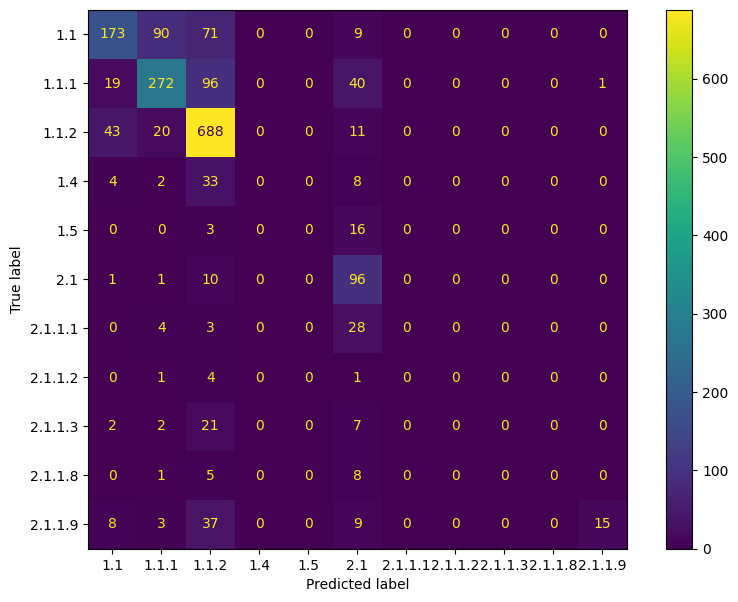

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
#plt.figure(figsize=[13,13])
disp = ConfusionMatrixDisplay(cm, display_labels = classifier.classes_)
fig, ax = plt.subplots(figsize=(10,7))
disp.plot(ax=ax)

In [ ]:
# Evaluate the classifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, balanced_accuracy_score, auc, hamming_loss
import numpy as np
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy =balanced_accuracy_score(y_test, y_pred)
MicroF = f1_score(y_test, y_pred,average = 'micro')
MacroF = f1_score(y_test, y_pred,average = 'macro')
precision_micro = precision_score(y_test, y_pred, average = 'micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_micro = recall_score(y_test,y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average = 'macro')
hamming_loss = hamming_loss(y_test, y_pred)
#auc = auc(y_test, y_pred)
print('Accuracy:', accuracy)
print('balanced accuracy: ', balanced_accuracy)
print('MicroF: ', MicroF)
print('MacroF: ', MacroF)
print('Hamming loss: ', hamming_loss)
print('Precision-Macro: ', precision_macro)
print('Precision-Micro: ', precision_micro)
print('Recall_micro: ', recall_micro)
print('Recall_macro: ', recall_macro)
#print('Area under the ROC curve: ', auc)


Accuracy: 0.6666666666666666
balanced accuracy:  0.2854542325330898
MicroF:  0.6666666666666666
MacroF:  0.26742052969916214
Hamming loss:  0.3333333333333333
Precision-Macro:  0.31244852209319274
Precision-Micro:  0.6666666666666666
Recall_micro:  0.6666666666666666
Recall_macro:  0.2854542325330898


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Interpretation:** The evaluation metrics of the flat classifier are the output of the above cell, besides, we computed and displayed the confusion metrics. The flat classifier has an average value of `Accuracy` 0.6667  which is the proportion of correctly classified instances out of the total instances, meaning the classifier correctly classified approximately 66.67% of the instances. Considering that some classes are outnumbering other classes, as seen in the confusion matrix plot, we check the `balanced_accuracy` value. The `balanced_accuracy` is the average recall obtained on each class, in the test data it is of a value of 0.2855, indicating that the average recall across all classes. Hence, we see that by considering the correctly classified instances from each class, the performance of the model is very low which is due to the imbalance issue in the data.

The `micro f-score` is computed globally by counting the true positive, false negatives, false positives, it equals 0.6667 indicating a good balance between precision and recall. However, the `macro f-score` provides an overall measure of the classifier's ability to correctly classifiy each class. When considering each class equally, the `macro-fscore` is of 0.2674 indicating a lower overall performance. Similarly, the `micro-precision` is 0.6667 indicating high precision at the global level, however the `macro-precision` is 0.3124 indicating moderate precision across all classes. Finally, the `micro-recall` is relatively considerable of 0.6667, indicating good recall globally, but as we seen with the `balanced_accuracy` the model is affected by the class imbalance. Besides, the `hamming loss` is relatively high indicating 33% of the instances were miscalssifid, for that its ability in the classification of each class is relatively low compared to the overall its classification performance.






## **3. Per Level Classification**

> ✔ **Approach**: Hierarchical Classification

**Hierarchy of Classes**

```
ROOT
--->1
    --->1.4
    --->1.5
    --->1.1
        --->1.1
        --->1.1.2
        --->1.1.1

--->2
    --->2.1
        --->2.1
        --->2.1.1
            --->2.1.1.9
            --->2.1.1.8
            --->2.1.1.2
            --->2.1.1.3
            --->2.1.1.1
```


In our dataset:
we have four levels:
* level 1: {1,2}
* level 2: {1.4, 1.5, 1.1, 2.1}
* level 3: {1.1, 1.1.2, 1.1.1, 2.1, 2.1.1}
* level 4: {2.1.1.9, 2.1.1.8, 2.1.1.2, 2.1.1.3, 2.1.1.1}

In this section, we implement a Per Level Classification:

As we have 4 levels in our hierarchy of classes, those instances that don't pertain to some levels will get 0. in other words, we will add n levels columns to our dataset, then we will implement a multiclass classifier for each level so we will get n classifiers. some instances are part of some leaf nodes in level n-2 or n-1 or a level before the down level n, those will be assigned to class of value 0 under the levels where they don't belong.



```
ROOT
--->1
    --->1.4
        --->0
            --->0
    --->1.5
        --->0
            --->0
    --->1.1
        --->1.1
            --->0
        --->1.1.2
            --->0
        --->1.1.1
            --->0

--->2
    --->2.1
        --->2.1
        --->2.1.1
            --->2.1.1.9
            --->2.1.1.8
            --->2.1.1.2
            --->2.1.1.3
            --->2.1.1.1
```




- level 1: {1,2}
- level 2: {1.4, 1.5, 1.1, 2.1}
- level 3: {1.1, 1.1.2, 1.1.1, 2.1, 2.1.1, 0}
- level 4: {2.1.1.9, 2.1.1.8, 2.1.1.2, 2.1.1.3, 2.1.1.1, 0}

This is  pre-processing for train and test datasets, before implementing the PerLevelClassifier Approach.

In [ ]:
# Preprocessing:
# Create separate columns for each level in the hierarchy
data_train[['level_1', 'level_2', 'level_3', 'level_4']] = data_train['formatted_classification'].str.split('.', expand=True)

# Fill NaN values with a placeholder (e.g., '0' or 'None')
PLC_train = data_train.fillna('0')

In [ ]:
# Preprocessing:
# Create separate columns for each level in the hierarchy
data_test[['level_1', 'level_2', 'level_3', 'level_4']] = data_test['formatted_classification'].str.split('.', expand=True)

# Fill NaN values with a placeholder (e.g., '0' or 'None')
PLC_test = data_test.fillna('0')

In [ ]:
PLC_test=PLC_test.drop(columns = ['classification', 'formatted_classification'], axis=1)
PLC_train = PLC_train.drop(columns = ['classification', 'formatted_classification'], axis=1)

In [ ]:
PLC_Ytest= PLC_test[['level_1',	'level_2',	'level_3',	'level_4']]

In [ ]:
PLC_Ytest.head()

,level_1,level_2,level_3,level_4
0,1,4,0,0
1,1,4,0,0
2,1,4,0,0
3,1,4,0,0
4,1,4,0,0


**Creating the Per level Classification -TOP DOWN Approach**

This classifier is also known as Local Classifier per Level (LCL), mainly consists on the following steps:

➢  Learn multi-class classifiers for all levels in the hierarchy

➢  Least popular among local approaches

➢  Prediction inconsistency may occur and hence post-processing
step is required

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

class HierarchicalClassifierTopDown:
    def __init__(self, levels, random_state=42):
        self.levels = levels
        self.classifiers = [SVC(random_state=random_state) for _ in range(levels)]

    def train_and_evaluate_hierarchy_top_down(self, X_train, y_train, X_test):
        for level in range(self.levels):
            print(f'Training and evaluating Level {level} classifier...')

            # Use the current level for training
            y_train_level = y_train[:, level]
            self.train_level_classifier(level, X_train, y_train_level)

            # Make predictions for the current level
            y_pred_level = self.predict_level(level, X_test)

            # Store predictions for all levels
            if level == 0:
                y_pred = y_pred_level
            else:
                y_pred = np.column_stack((y_pred, y_pred_level))

        return y_pred

    def train_level_classifier(self, level, X_train, y_train_level):
        classifier = self.classifiers[level]
        classifier.fit(X_train, y_train_level)

    def predict_level(self, level, X):
        classifier = self.classifiers[level]
        return classifier.predict(X)

# Set the 'level' columns as the target variables
target_columns = ['level_1', 'level_2', 'level_3', 'level_4']
X_train = PLC_train.drop(columns=target_columns)
y_train = PLC_train[target_columns]

X_test = PLC_test.drop(columns=target_columns)
y_test = PLC_test[target_columns]

# Create the HierarchicalClassifierTopDown
hierarchical_classifier_top_down = HierarchicalClassifierTopDown(levels=4)

# Train and evaluate the hierarchical classifier in a top-down manner
y_pred = hierarchical_classifier_top_down.train_and_evaluate_hierarchy_top_down(X_train, y_train.values, X_test)

# Display predictions for all levels
print('Predictions for all levels:')
print(pd.DataFrame(y_pred, columns=target_columns))


Training and evaluating Level 0 classifier...
Training and evaluating Level 1 classifier...
Training and evaluating Level 2 classifier...
Training and evaluating Level 3 classifier...
Predictions for all levels:
     level_1 level_2 level_3 level_4
0          1       1       2       0
1          1       1       2       0
2          1       1       2       0
3          1       1       2       0
4          1       1       2       0
...      ...     ...     ...     ...
1861       1       1       2       0
1862       1       1       2       0
1863       1       1       1       0
1864       1       1       2       0
1865       1       1       0       0

[1866 rows x 4 columns]


In [ ]:
PLC_test.shape

(1866, 340)

In [ ]:
from sklearn.metrics import hamming_loss, f1_score

def evaluate_hierarchy(y_true, y_pred_all_levels):
    num_levels = ['level_1', 'level_2', 'level_3', 'level_4']

    hamming_loss_value = 0.0
    Micro_f1_score = 0.0
    Macro_f1_score = 0.0

    for level in ['level_1', 'level_2', 'level_3', 'level_4']:
        y_true_level = y_true[level]
        y_pred_level = y_pred_all_levels[level]
        micro_f1score= f1_score(y_true_level, y_pred_level, average='micro')
        macro_f1score = f1_score(y_true_level, y_pred_level, average='macro')

        hamming_loss_value += hamming_loss(y_true_level, y_pred_level)
        Micro_f1_score += micro_f1score
        Macro_f1_score += macro_f1score

        print(f'Level {level} Metrics:')
        print(f'Micro f1-score: {micro_f1score:.2f}')
        print(f'Macro f1-score: {macro_f1score:.2f}')
        print(f'hamming loss: {hamming_loss_value:.2f}')

    hamming_loss_value /= len(num_levels)
    Micro_f1_score/=len(num_levels)
    Macro_f1_score/=len(num_levels)

    print('Hierarchy Metrics:')
    print(f'hamming_loss_value: {hamming_loss_value:.2f}')
    print(f'Average Macro f1-score:{Macro_f1_score:.2f}')
    print(f'Average Micro f1-score:{Micro_f1_score:.2f}')

In [ ]:
Y_pred=pd.DataFrame(y_pred, columns=['level_1', 'level_2', 'level_3', 'level_4'])
Y_pred.head()

,level_1,level_2,level_3,level_4
0,1,1,2,0
1,1,1,2,0
2,1,1,2,0
3,1,1,2,0
4,1,1,2,0


In [ ]:
evaluate_hierarchy(PLC_Ytest, Y_pred)

Level level_1 Metrics:
Micro f1-score: 0.86
Macro f1-score: 0.50
hamming loss: 0.14
Level level_2 Metrics:
Micro f1-score: 0.96
Macro f1-score: 0.33
hamming loss: 0.17
Level level_3 Metrics:
Micro f1-score: 0.66
Macro f1-score: 0.63
hamming loss: 0.51
Level level_4 Metrics:
Micro f1-score: 0.92
Macro f1-score: 0.20
hamming loss: 0.59
Hierarchy Metrics:
hamming_loss_value: 0.15
Average Macro f1-score:0.41
Average Micro f1-score:0.85


**Interpretation:** The local classifier per node consist on creating a classifier at each level of the hierarchy of classes. Since in the `mips` dataset has 4 levels, four classifiers have been trained and evaluated. The evaluation metrics for the classification of instances at each level is computed (`Micro f1-score`, `Macro f1-score`, `hamming loss`), then their average is calculated to evaluate the hirarchical classifier globally.

For the first level we have binary classes {1, 2}. The `micro f1-score` is 0.86, indicating a high balance between precision and recall globally. However, when considering each class equally the `macro f1-core` is 0.50 indicating moderate performance in terms of the trade-off between the precision and recall. The Hamming Loss is 0.14, indicating that approximately 14% of the labels are incorrectly predicted by the classifier. As a result, the classifier performs very well in terms of overall accuracy (`Micro F1-score`), but there might be some variability in performance across individual classes (`Macro F1-score`). However, the Hamming Loss indicates that there is still room for improvement, as a significant portion of the labels are misclassified. The three other classifiers are multiclass classifiers where the number of classes is four, six, and six, respectively. The classifier at the level2 and that at the level 4 achieved an optimal value of the `micro f1-score` indicating their excellent classification performance globally. Nevertheless, the `macro f1-score` for both classifiers is relatively low, indicating that the classifiers are not equally performing on the classes, further they are influence by the class imbalance. Consequently, the ratio of misclassification is high and the `hamming loss` is considerably high referring to the low ability of the classifiers in classifying  each class correctly, though they are globally well performing by considering the total correctly classified instances. The classifier at the level 3 is moderately performing whether overall (`macro f1-score`) or across the classes (`micro f1-score`), indicating its average classification performance, besides the `hamming loss` of the model at this level is high indicating the poor performance of the classifier in correctly classifying the instances.

Finally, the hierarchical classifier attained a `micro f1-score` of 0.85 which significant showing the overall classification performance of the model, however it has a low `macro f1-score` value of 0.41 referring to the low pereformance of the classifier at identifying each class in the hierarchy. Besides, the hamming loss of the hierachical classifier is 0.15 indicating that 15% of the instances are misclassified. Although, the Per Level hierarchical classification model is performing well globally, it is moderately performing at each level classification.


##**4. Comparative Analysis and Conclusion:**


**Description:** In this hierarchical classification task, we have chosen two hierarchical classification approaches: flat classification (down to earth) and Top-Down classification particularly the Local Classifier per Level (LCL). We employed a public hierachical classification dataset called `mips`. First we processed the dataset generally. We further processed the classes before training each implemented algorithm. Evaluation of each model have been carried out on the test data and selected classification metrics have been calculated.

**Comparative Analysis and Conclusion:** The approach based on ignoring the hierarchy of classes by turning the hierarchical classification task into a multi class classification provided moderate classification performance in term of `micro f1-score` but at it ability of identifying each class is significantly low where it misclassified 33% of the instances. On the other hand, the approach considring the hierarchy of the class which adopt a local classifier per level attained a significant classification performance globally, however relatively lower performance across the classes, besides it misclassifies 15% of the instances. Although the local per level classification algorithm is relatively underperforming in classifying each class equally, still considerably exceeds the flat classification algorithm regarding the employed hierarchical classification dataset. One data issue is negatively influencing the performance of both implemented algorithms is the class imbalance, however, the local classifier per level is less influenced.

## **References**

Used Datasets:

https://github.com/geantrindade/TEsHierarchicalDatasets